# Goal: Create A Green Pigment Expressing E. coli

I have a collection of colors for agar art, but no good green (apart from GFP but that requires UV/blue light to shine).

I want to design a plasmid that fills this gap. Rather than starting from an existing green (there are suprisingly few good options) we're going to cheat and combine a blue and a yellow.

## Prepping DNA seqs for the proteins

We have both AA seqs. For aeBlue we grab a gene from GenBank, for fwYellow we back-translate with greedy 'use the most common codon for this AA in ecoli' method.

In [ ]:
fwyellow = "MTALTEGAKL FEKEIPYITE LEGDVEGMKF IIKGEGTGDA SVGKVDAQFI CTTGDVPVPW STLVTTLTYG AQCFAKYPRH IADFFKSCMP EGYVQERTIT FEGDGVFKTR AEVTFENGSV YNRVKLNGQG FKKDGHVLGK NLEFNFTPHC LYIWGDQANH GLKSAFKIMH EITGSKEDFI VADHTQMNTP IGGGPVHVPE YHHITYHVTL SKDVTDHRDH LNIVEVIKAV DLETYR GSGREEN".replace(" ", "") # from https://www.fpbase.org/protein/fwyellow/ ... ish;)
fwyellow

'MTALTEGAKLFEKEIPYITELEGDVEGMKFIIKGEGTGDASVGKVDAQFICTTGDVPVPWSTLVTTLTYGAQCFAKYPRHIADFFKSCMPEGYVQERTITFEGDGVFKTRAEVTFENGSVYNRVKLNGQGFKKDGHVLGKNLEFNFTPHCLYIWGDQANHGLKSAFKIMHEITGSKEDFIVADHTQMNTPIGGGPVHVPEYHHITYHVTLSKDVTDHRDHLNIVEVIKAVDLETYRGSGREEN'

In [ ]:
aeblue = "MASLVKKDMC IKMTMEGTVN GHHFKCVGEG EGKPFEGTQV EKIRITEGGP LPFAYDILAP CCMYGSKTFI KHVSGIPDYF KESFPEGFTW ERTQIFEDGG YLTIHQDTSL QGNNFIFKVN VIGANFPANG PVMQKKTAGW EPCVEMLYPR DGVLCGQSLM ALKCTDGNHL TSHLRTTYRS RKPSNAVNMP EFHFGDHRIE ILKAEQGKFY EQYESAVARY CEAAPSKLGH H".replace(" ", "") # from https://www.fpbase.org/protein/aeblue/ GenBank: DQ159069
aeblue

'MASLVKKDMCIKMTMEGTVNGHHFKCVGEGEGKPFEGTQVEKIRITEGGPLPFAYDILAPCCMYGSKTFIKHVSGIPDYFKESFPEGFTWERTQIFEDGGYLTIHQDTSLQGNNFIFKVNVIGANFPANGPVMQKKTAGWEPCVEMLYPRDGVLCGQSLMALKCTDGNHLTSHLRTTYRSRKPSNAVNMPEFHFGDHRIEILKAEQGKFYEQYESAVARYCEAAPSKLGHH'

In [ ]:
# from Bio import Entrez, SeqIO
# Entrez.email = "your email here"
# handle = Entrez.efetch(db="nucleotide", id="DQ159069", rettype="gb", retmode="text")
# aeblue_record = SeqIO.read(handle, "genbank")
# aeblue_dna = str([f for f in aeblue_record.features if f.type == 'CDS'][0].extract(aeblue_record.seq))

In [ ]:
aeblue_dna = 'ATGGCTTCATTGGTTAAGAAGGATATGTGCATCAAGATGACCATGGAAGGGACAGTAAATGGTCACCATTTCAAGTGTGTAGGAGAAGGAGAAGGCAAGCCATTTGAAGGTACCCAGGTGGAAAAGATAAGAATCACTGAAGGTGGTCCCTTGCCATTTGCGTACGATATTTTGGCACCTTGTTGCATGTATGGAAGTAAGACCTTCATCAAGCATGTCTCAGGGATTCCAGATTACTTCAAGGAGTCTTTTCCTGAAGGCTTCACTTGGGAAAGAACCCAAATCTTCGAGGATGGAGGCTATCTCACCATTCACCAGGACACGAGCTTGCAGGGAAATAACTTCATTTTCAAGGTTAATGTCATCGGTGCCAACTTCCCTGCCAATGGTCCCGTGATGCAGAAGAAAACAGCAGGATGGGAACCATGCGTAGAGATGCTTTATCCACGTGACGGTGTCCTGTGTGGGCAGTCCTTGATGGCCCTGAAATGCACTGATGGTAACCATTTGACGAGCCATCTGCGAACTACCTACAGGTCCAGAAAGCCATCCAATGCAGTTAATATGCCAGAATTTCATTTTGGAGACCATCGCATTGAGATACTAAAGGCAGAACAAGGCAAGTTTTATGAACAGTACGAATCAGCGGTGGCCAGGTACTGTGAGGCGGCACCATCAAAGCTTGGACATCACTAA'

In [ ]:
aeblue_dna[:12], aeblue_dna[-12:]

('ATGGCTTCATTG', 'GGACATCACTAA')

In [ ]:
# !pip install python-codon-tables

In [ ]:
from python_codon_tables import get_codons_table
ecoli_table = get_codons_table('e_coli')
# ecoli_table

In [ ]:
def back_translate(aa_seq, codon_table):
    return ''.join([max(codon_table[aa].items(), key=lambda x: x[1])[0] for aa in aa_seq])

fwyellow_dna = back_translate(fwyellow, ecoli_table) + 'TAA' # (adding a stop codon)
fwyellow_dna[:12], fwyellow_dna[-12:]

('ATGACCGCGCTG', 'GAAGAAAACTAA')

**Note**: We've grabbed the wild type aeBlue, which *does* express in ecoli. There are also optimized sequences available for ecoli but I'm going to try this for now. For fwyellow, I've done a somewhat naive back-translation from the seq of the protein using the most common ecoli codon for each AA.

In [ ]:
len(aeblue_dna), len(fwyellow_dna)

(696, 732)

## Useful bits

Nabbing some pieces from sebs pIDMv5K-J23100-fuGFP-B1006

In [ ]:
sebs = """GTAAAACGACGGCCAGTGAATTCTTGACGGCTAGCTCAGTCCTAGGTACAGTGCTAGCTACTAGAGATTAAAGAGGAGAAAGAGTCCcatggtgagcagtggcgaagatattttctcgggcttggttccgattctgatcgagctggagggcgacgtgaacggtcatcgttttagcgttcgcggtgaaggttatggcgacgcgagcaacggcaaactggaaattaagttcatctgcacgaccggtcgcctgccggtgccttggccgaccttggtgacgaccttgtcgtatggcgtgcagtgttttgcgaagtatccggagcacatgcgccaaaacgatttctttaaaagtgccatgccggacggttacgtccaggagcgtaccatttccttcaaggaagatggcacgtacaaaactcgcgcagaggttaagtttgaaggtgaagcgctggtcaatcgtatcgatttgaagggtttggagtttaaagaggatggtaacattctgggccataaactggagtatagcttcaacagccattatgtttacattacggcagacaagaatcgtaacggcttggaggcccaattccgtattcgccacaatgttgatgacggtagcgtccaactggccgaccattaccaacagaacaccccaattggtgagggtccggtgttgctgccggaacaacactatctgacgaccaatagcgtgctgagcaaagatccgcaggaacgccgtgatcacatggtcctggtggaatttgtgaccgctgcgggcttgagcctgggtatggacgagctgtataagagctaataagagctCAAAAAAAAACCCCGCCCCTGACAGGGCGGGGTTTTTTTTGGTACCGTCATAGCTGTTTCCTGCCCGGGTCTAGAAAAGCCACGTTGTGTCTCAAAATCTCTGATGTTACATTGCACAAGATAAAAATATATCATCATGAACAATAAAACTGTCTGCTTACATAAACAGTAATACAAGGGGTGTTATGAGCCATATTCAACGGGAAACGTCTTGCTCGAGGCCGCGATTAAATTCCAACATGGATGCTGATTTATATGGGTATAAATGGGCTCGCGATAATGTCGGGCAATCAGGTGCGACAATCTATCGATTGTATGGGAAGCCCGATGCGCCAGAGTTGTTTCTGAAACATGGCAAAGGTAGCGTTGCCAATGATGTTACAGATGAGATGGTCAGACTAAACTGGCTGACGGAATTTATGCCTCTTCCGACCATCAAGCATTTTATCCGTACTCCTGATGATGCATGGTTACTCACCACTGCGATCCCCGGCAAAACAGCATTCCAGGTATTAGAAGAATATCCTGATTCAGGTGAAAATATTGTTGATGCGCTGGCAGTGTTCCTGCGCCGGTTGCATTCGATTCCTGTTTGTAATTGTCCTTTTAACAGCGATCGCGTATTTCGTCTGGCTCAGGCGCAATCACGAATGAATAACGGTTTGGTTGATGCGAGTGATTTTGATGACGAGCGTAATGGCTGGCCTGTTGAACAAGTCTGGAAAGAAATGCATAAGCTGTTGCCATTCTCACCGGATTCAGTCGTCACTCATGGTGATTTCTCACTTGATAACCTTATTTTTGACGAGGGGAAATTAATAGGTTGTATTGATGTTGGACGAGTGGGAATCGCAGACCGATACCAGGATCTTGCCATCCTATGGAACTGCCTCGGTGAGTTTTCTCCTTCATTACAGAAACGGCTTTTTCAAAAATATGGTATTGATAATCCTGATATGAATAAATTGCAGTTTCATTTGATGCTCGATGAGTTTTTCTAAAAGCTTtatagattacaGTCGACAGATCAAAGGATCTTCTTGAGATCCTTTTTTTCTGCGCGTAATCTGCTGCTTGCAAACAAAAAAACCACCGCTACCAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCAAATACTGTTCTTCTAGTGTAGCCGTAGTTAGGCCACCACTTCAAGAACTCTGTAGCACCGCCTACATACCTCGCTCTGCTAATCCTGTTACCAGTGGCTGCTGCCAGTGGCGATAAGTCGTGTCTTACCGGGTTGGACCCAAGACGATAGTTACCGGATAAGGCGCAGCGGTCGGGCTGAACGGGGGGTTCGTGCACACAGCCCAGCTTGGAGCGAACGACCTACACCGAACTGAGATACCTACAGCGTGAGCTATGAGAAAGCGCCACGCTTCCCGAAGGGAGAAAGGCGGACAGGTATCCGGTAAGCGGCAGGGTCGGAACAGGAGAGCGCACGAGGGAGCTTCCAGGGGGAAACGCCTGGTATCTTTATAGTCCTGTCGGGTTTCGCCACCTCTGACTTGAGCGTCGATTTTTGTGATGCTCGTCAGGGGGGCGGAGCCTATGGAAAAACGCCAGCAACGCG"""
len(sebs) # 2463 bp

2463


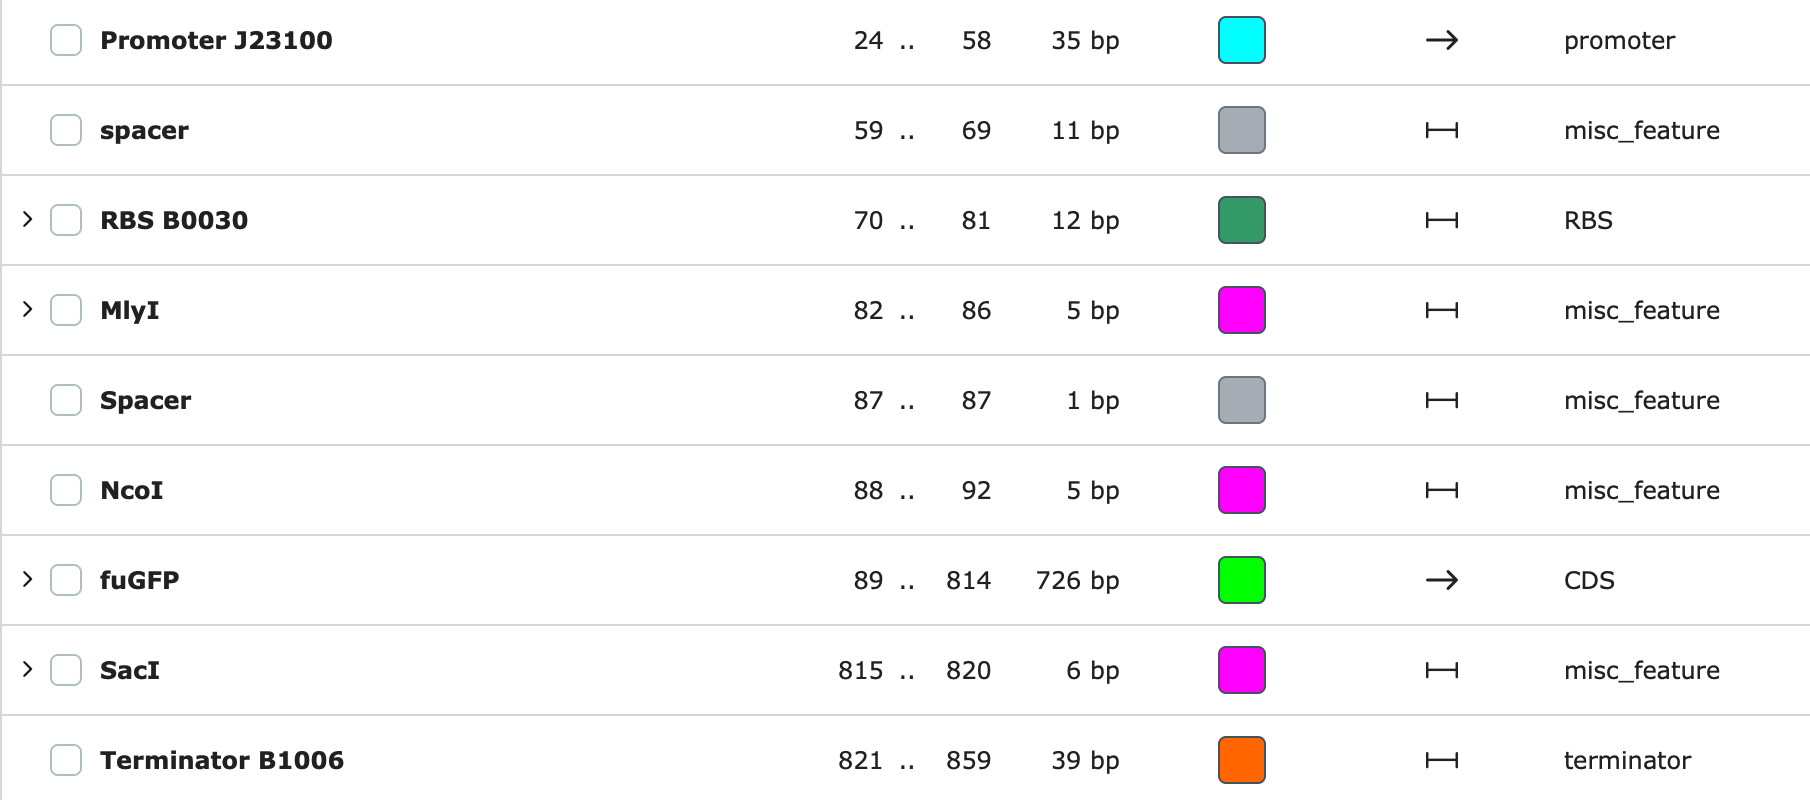


In [ ]:
# Extract features from Seb's sequence based on the positions in the screenshot (Gah 1-indexing in snapgene!)
promoter_j23100 = sebs[23:58]  # 35 bp
spacer1 = sebs[58:69]  # 11 bp
rbs_b0030 = sebs[69:81]  # 12 bp
mlyi = sebs[81:86]  # 5 bp
spacer2 = sebs[86:87]  # 1 bp
ncoi = sebs[87:92]  # 5 bp
fugfp = sebs[88:814]  # 726 bp (the CDS we'll replace)
saci = sebs[814:820]  # 6 bp
terminator_b1006 = sebs[820:859]  # 39 bp

In [ ]:
# Check
print("Promoter J23100:", promoter_j23100)
print(f"Length: {len(promoter_j23100)} bp\n")
print("Spacer:", spacer1)
print(f"Length: {len(spacer1)} bp\n")
print("RBS B0030:", rbs_b0030)
print(f"Length: {len(rbs_b0030)} bp\n")
print("MlyI:", mlyi)
print(f"Length: {len(mlyi)} bp\n")
print("Spacer:", spacer2)
print(f"Length: {len(spacer2)} bp\n")
print("NcoI:", ncoi)
print(f"Length: {len(ncoi)} bp\n")
print("fuGFP (first 50bp):", fugfp[:50])
print(f"Length: {len(fugfp)} bp\n")
print("SacI:", saci)
print(f"Length: {len(saci)} bp\n")
print("Terminator B1006:", terminator_b1006)
print(f"Length: {len(terminator_b1006)} bp\n")

Promoter J23100: TTGACGGCTAGCTCAGTCCTAGGTACAGTGCTAGC
Length: 35 bp

Spacer: TACTAGAGATT
Length: 11 bp

RBS B0030: AAAGAGGAGAAA
Length: 12 bp

MlyI: GAGTC
Length: 5 bp

Spacer: C
Length: 1 bp

NcoI: catgg
Length: 5 bp

fuGFP (first 50bp): atggtgagcagtggcgaagatattttctcgggcttggttccgattctgat
Length: 726 bp

SacI: gagctC
Length: 6 bp

Terminator B1006: AAAAAAAAACCCCGCCCCTGACAGGGCGGGGTTTTTTTT
Length: 39 bp



In [ ]:
# Aside: J23100 is a strong promoter, a couple of sanity-check-questions to LLMs turned up a suggestion to switch it out to avoid over-burdening the cells in a high-copy vector. Here's one that is half as strong:
promoter_j23106 = "tttacggctagctcagtcctaggtatagtgctagc" 

## Core: promoter - RBS - aeBlue - RBS - fwYellow - terminator

In [ ]:
rbs_b0030

'AAAGAGGAGAAA'

Time to assemble the casette. I want the weaker yellow first since I worry aeBlue will otherwise dominate. aeBlue is a tetramer, fwYellow is somewhat weakly yellow, think it's a momomer or dimer.

In [ ]:
# Standard spacer between RBS and ATG (from Seb's construct pattern)
rbs_spacer = "GAGTCC"  # includes part of MlyI site, 6bp before ATG

# Intergenic spacer - gives ribosome room to reinitiate
intergenic = "TACTAGAG"  # ~8bp, can adjust

# Assembly: Promoter → RBS → fwYellow → RBS → aeBlue → Terminator
cassette = (
    promoter_j23106 +      # Medium-strength promoter
    spacer1 +              # Post-promoter spacer
    rbs_b0030 +            # RBS for fwYellow
    rbs_spacer +           # Spacer to ATG
    fwyellow_dna +         # fwYellow CDS (with stop)
    intergenic +           # Intergenic region
    rbs_b0030 +            # RBS for aeBlue (could weaken this)
    rbs_spacer +           # Spacer to ATG  
    aeblue_dna +           # aeBlue CDS
    terminator_b1006       # Terminator
)

print(f"Cassette length: {len(cassette)} bp")
print(f"First 100bp: {cassette[:100]}")
print(f"Last 50bp: {cassette[-50:]}")

Cassette length: 1557 bp
First 100bp: tttacggctagctcagtcctaggtatagtgctagcTACTAGAGATTAAAGAGGAGAAAGAGTCCATGACCGCGCTGACCGAAGGCGCGAAACTGTTTGAA
Last 50bp: GACATCACTAAAAAAAAAAACCCCGCCCCTGACAGGGCGGGGTTTTTTTT


In [ ]:
from Bio.Seq import Seq

Prompt: Check translated sequences to ensure frame and identity is preserved after modifications

In [ ]:
# Structure: promoter(35) + spacer1(11) + rbs(12) + rbs_spacer(6) + fwYellow(711) + intergenic(8) + rbs(12) + rbs_spacer(6) + aeBlue(696) + terminator(39)

# Calculate positions
fwy_start = len(promoter_j23106) + len(spacer1) + len(rbs_b0030) + len(rbs_spacer)
fwy_end = fwy_start + len(fwyellow_dna)

aeb_start = fwy_end + len(intergenic) + len(rbs_b0030) + len(rbs_spacer)
aeb_end = aeb_start + len(aeblue_dna)

print(f"fwYellow: {fwy_start} - {fwy_end} ({fwy_end - fwy_start} bp)")
print(f"aeBlue: {aeb_start} - {aeb_end} ({aeb_end - aeb_start} bp)")

# Extract and translate
fwy_from_cassette = cassette[fwy_start:fwy_end]
aeb_from_cassette = cassette[aeb_start:aeb_end]

fwy_translated = str(Seq(fwy_from_cassette).translate())
aeb_translated = str(Seq(aeb_from_cassette).translate())

print(f"\n--- fwYellow ---")
print(f"Starts with ATG: {fwy_from_cassette[:3]}")
print(f"Ends with stop: {fwy_from_cassette[-3:]}")
print(f"Translated (first 50 AA): {fwy_translated[:50]}")
print(f"Expected (first 50 AA):   {fwyellow[:50]}")
print(f"Match: {fwy_translated.rstrip('*') == fwyellow}")

print(f"\n--- aeBlue ---")
print(f"Starts with ATG: {aeb_from_cassette[:3]}")
print(f"Ends with stop: {aeb_from_cassette[-3:]}")
print(f"Translated (first 50 AA): {aeb_translated[:50]}")
print(f"Expected (first 50 AA):   {aeblue[:50]}")
print(f"Match: {aeb_translated.rstrip('*') == aeblue}")

fwYellow: 64 - 796 (732 bp)
aeBlue: 822 - 1518 (696 bp)

--- fwYellow ---
Starts with ATG: ATG
Ends with stop: TAA
Translated (first 50 AA): MTALTEGAKLFEKEIPYITELEGDVEGMKFIIKGEGTGDASVGKVDAQFI
Expected (first 50 AA):   MTALTEGAKLFEKEIPYITELEGDVEGMKFIIKGEGTGDASVGKVDAQFI
Match: True

--- aeBlue ---
Starts with ATG: ATG
Ends with stop: TAA
Translated (first 50 AA): MASLVKKDMCIKMTMEGTVNGHHFKCVGEGEGKPFEGTQVEKIRITEGGP
Expected (first 50 AA):   MASLVKKDMCIKMTMEGTVNGHHFKCVGEGEGKPFEGTQVEKIRITEGGP
Match: True


This is going to be placed into GenScript's flash gene service pUC57-Kan vector. They have a lac promoter that'll end up right by our terminator and won't really do much.

I'm hoping that the blue being downstream will mean less expression and less chance it dominates the color.

In [ ]:
cassette

'tttacggctagctcagtcctaggtatagtgctagcTACTAGAGATTAAAGAGGAGAAAGAGTCCATGACCGCGCTGACCGAAGGCGCGAAACTGTTTGAAAAAGAAATTCCGTATATTACCGAACTGGAAGGCGATGTGGAAGGCATGAAATTTATTATTAAAGGCGAAGGCACCGGCGATGCGAGCGTGGGCAAAGTGGATGCGCAGTTTATTTGCACCACCGGCGATGTGCCGGTGCCGTGGAGCACCCTGGTGACCACCCTGACCTATGGCGCGCAGTGCTTTGCGAAATATCCGCGCCATATTGCGGATTTTTTTAAAAGCTGCATGCCGGAAGGCTATGTGCAGGAACGCACCATTACCTTTGAAGGCGATGGCGTGTTTAAAACCCGCGCGGAAGTGACCTTTGAAAACGGCAGCGTGTATAACCGCGTGAAACTGAACGGCCAGGGCTTTAAAAAAGATGGCCATGTGCTGGGCAAAAACCTGGAATTTAACTTTACCCCGCATTGCCTGTATATTTGGGGCGATCAGGCGAACCATGGCCTGAAAAGCGCGTTTAAAATTATGCATGAAATTACCGGCAGCAAAGAAGATTTTATTGTGGCGGATCATACCCAGATGAACACCCCGATTGGCGGCGGCCCGGTGCATGTGCCGGAATATCATCATATTACCTATCATGTGACCCTGAGCAAAGATGTGACCGATCATCGCGATCATCTGAACATTGTGGAAGTGATTAAAGCGGTGGATCTGGAAACCTATCGCGGCAGCGGCCGCGAAGAAAACTAATACTAGAGAAAGAGGAGAAAGAGTCCATGGCTTCATTGGTTAAGAAGGATATGTGCATCAAGATGACCATGGAAGGGACAGTAAATGGTCACCATTTCAAGTGTGTAGGAGAAGGAGAAGGCAAGCCATTTGAAGGTACCCAGGTGGAAAAGATAAGAATCACTGAAGGTGGTCCCTTGCCATTTGCGTACGATATTTTGGCA

In [ ]:
len(cassette)

1557